# Bibliotecas

In [28]:
from montaDataset import pegaData
from imagem import Imagem
from otsu_niblack import otsu, niblack
from matplotlib import pyplot as plt #para plotar os gráficos
from aplicaKM import aplicaKM
from sklearn.cluster import SpectralClustering, AgglomerativeClustering, KMeans, AffinityPropagation, MeanShift, estimate_bandwidth #para usar o KMeans
import numpy as np
from skimage.io import imread,imsave,imshow
from matplotlib import pyplot as plt #para plotar os gráficos
from sklearn.cluster import KMeans #para usar o KMeans
from skimage.filters.rank import mean
from skimage.filters.thresholding import threshold_otsu
from glob import glob
from skimage.io import imsave
from otsu_niblack import otsu, niblack
import pandas as pd
from sklearn.metrics import jaccard_score, f1_score
from sklearn.metrics import accuracy_score, cohen_kappa_score, roc_auc_score

# Dataset

In [2]:
dataset = pegaData('ultrassound/cropped/')
datasetMask = pegaData('ultrassound/masks/')
datasetKMeans = pegaData('results/kmeans/')
datasetOtsu = pegaData('results/otsu/')
datasetNiblack = pegaData('results/niblack/')
datasetAglo = pegaData('results/aglo/')

In [3]:
img = Imagem(dataset[1])
img.ler()

# Questão 01

## K-Means
Criação do dataset com imagens com K-Means aplicados.

In [ ]:
def aplica_kmeans(imagens):
    for i in imagens:
        img = Imagem(i)
        img.ler()
        img_media = mean(img.dimensoes[0], np.ones((10,10)))
        kmeans = KMeans(n_clusters = 2)
        trimg = np.reshape(img_media, (-1,1))
        kmeans.fit(trimg)
        result = (kmeans.labels_.reshape(img_media.shape))
        local = i
        new = './results/kmeans/' + local.replace("./ultrassound/cropped/","")
        imsave(new,result)

In [ ]:
#aplica_kmeans(dataset)

## Niblack e Otsu

In [ ]:
def aplica_otsu_niblack(imagens):
    # Função que cria a cópia do dataset com imagens com otsu e niblack aplicados.
    for i in imagens:
        img = Imagem(i)
        img.ler()
        o = otsu(img.dimensoes[0])
        n = niblack(img.dimensoes[0], ws=25, k=0.8)
        local = i
        new1 = './ultrassound/otsu/'
        new2 = './ultrassound/niblack/'
        plt.imsave(new1,o,cmap='gray')
        plt.imsave(new2,n,cmap='gray')


## Outras Funções de Agrupamento

In [8]:
def aglomeracao(imagem):
    ms = AgglomerativeClustering(n_clusters=2)
    f = np.reshape(imagem, (-1,1))
    ms.fit(f)
    resultado = (ms.labels_.reshape(imagem.shape))
    return resultado

In [6]:
def espectral(imagem):
    e = SpectralClustering(n_clusters=2)
    f = np.reshape(imagem, (-1,1))
    e.fit(f)
    resultado = (e.labels_.reshape(imagem.shape))
    return resultado

In [7]:
def aplicarClus(imagem):
    return {
        'aglomeracao': aglomeracao(imagem),
        'espectral': espectral(imagem)
    }
    

In [11]:
def datasetAglomeracao(dataset):
    for i in dataset:
        imagem = Imagem(i)
        imagem.ler()
        imagem.redimensionar(porcentagem=0.3)
        aux = aglomeracao(imagem.img_redimensionada)
        local = i
        new = './results/aglo/' + local.split('/')[-1]
        imsave(new, aux)

In [12]:
datasetAglomeracao(dataset)

/tmp/ipykernel_6028/3964677648.py:9: UserWarning: ./results/aglo/1100208028.bmp is a low contrast image
  imsave(new, aux)
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_6028/3964677648.py:9: UserWarning: ./results/aglo/1100209013.bmp is a low contrast image
  imsave(new, aux)
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_6028/3964677648.py:9: UserWarning: ./results/aglo/1100210009.bmp is a low contrast image
  imsave(new, aux)
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_6028/3964677648.py:9: UserWarning: ./results/aglo/1100210637.bmp is a low contrast image
  imsave(new, aux)
Lossy conversion from int64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
/tmp/ipykernel_6028/3964677648.py:9: Use

In [12]:
img_teste = Imagem(dataset[0])
img_teste.ler()
img_teste.redimensionar(porcentagem=0.3)

In [14]:
r = aplicarClus(img_teste.img_redimensionada)

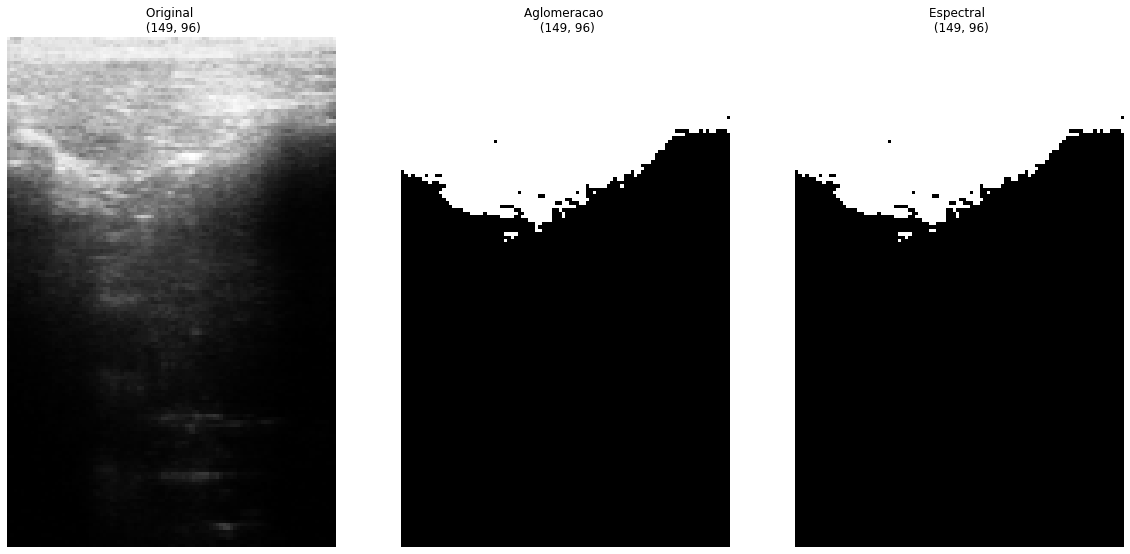

In [18]:
img.manyShowWithTitle(
    {'img': img_teste.img_redimensionada, 'title': 'Original'},
    {'img': r['aglomeracao'], 'title': 'Aglomeracao'},
    {'img': r['espectral'], 'title': 'Espectral'}
)

## Comparação

In [30]:
def comparacao(imagem=img, indice=0):
    tamanho = imread(dataset[indice]).shape
    imagem.abrirVarios(dataset[indice], datasetMask[indice], datasetKMeans[indice], datasetOtsu[indice], datasetNiblack[indice])
    imagem.mostraIMGS(['Original', 'Mask', 'KMeans', 'Otsu', 'Niblack'])
    imagem.imgs = []

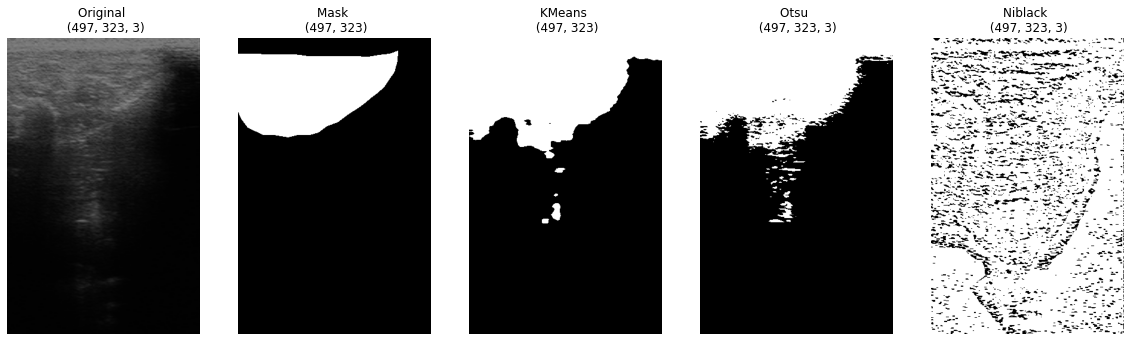

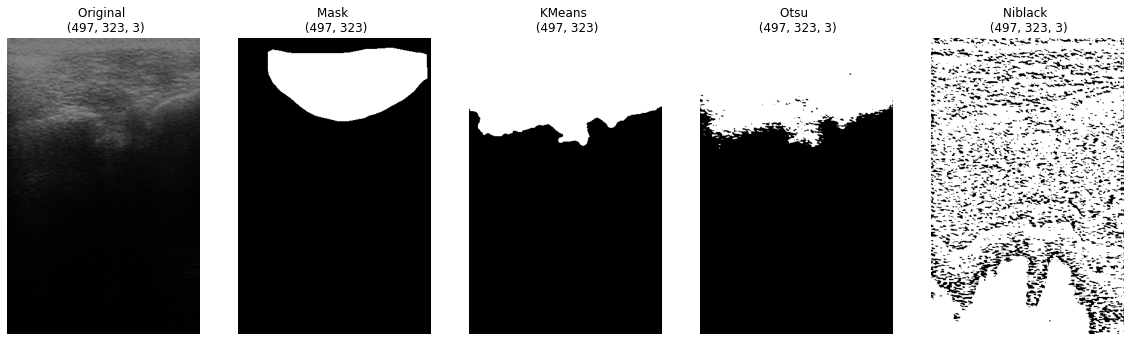

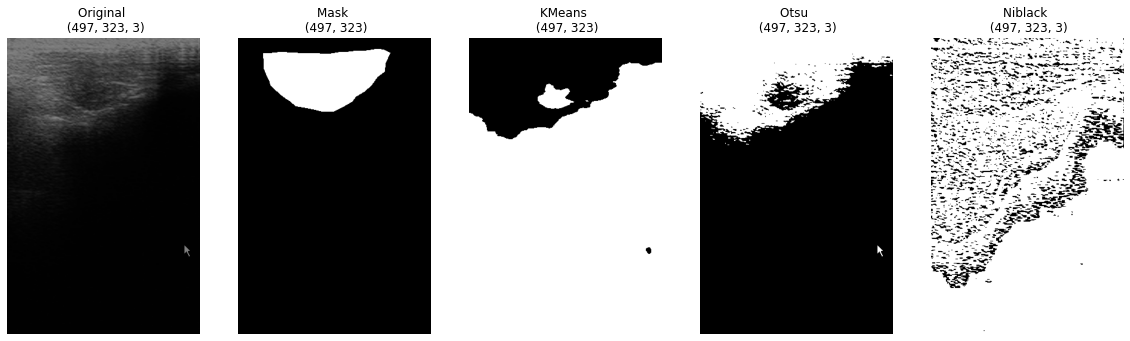

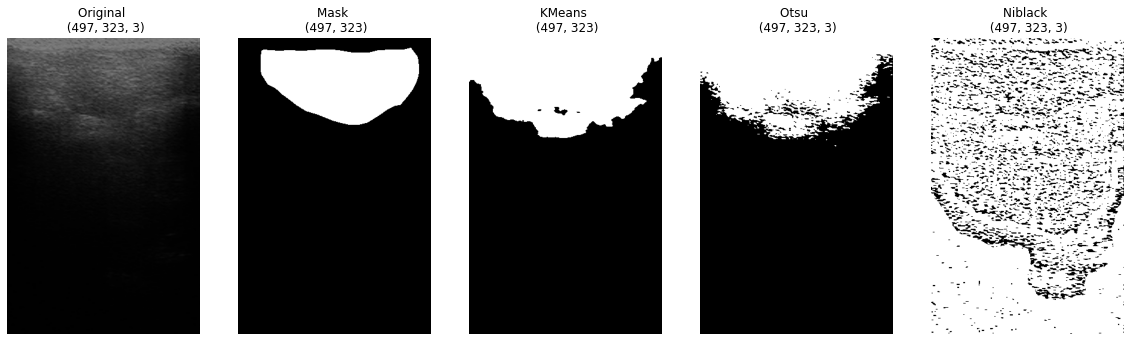

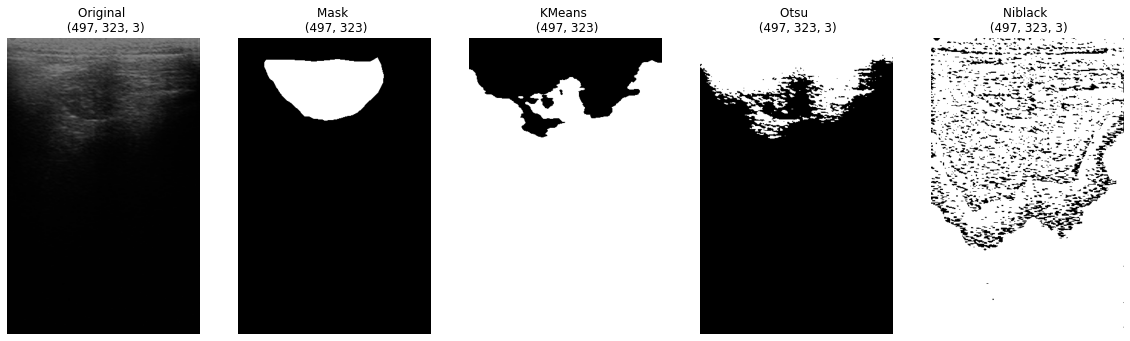

In [32]:
for i in range(5):
    comparacao(img, i)

# Questão 02

Inicialmente, aplico o K-Means na imagem. <br>
Crio uma cópia da imagem. Utilizando np.zeros. <br>
E crio duas imagens, selecionando 0 do primeiro cluste para a imagem do background. <br>
E selecionando o 1 para a imagem do foreground. <br>

In [19]:
def fore_back(imagem):

    imgS = aplicaKM(KMeans(n_clusters=2), imagem)

    c1 = imgS == 0
    c2 = imgS == 1

    bk = np.zeros_like(imagem)
    bk[c1] = imagem[c1]

    fg = np.zeros_like(imagem)
    fg[c2] = imagem[c2]

    return {'background': bk, 'foreground': fg}

In [17]:
b_f_teste = fore_back(img.dimensoes[0])

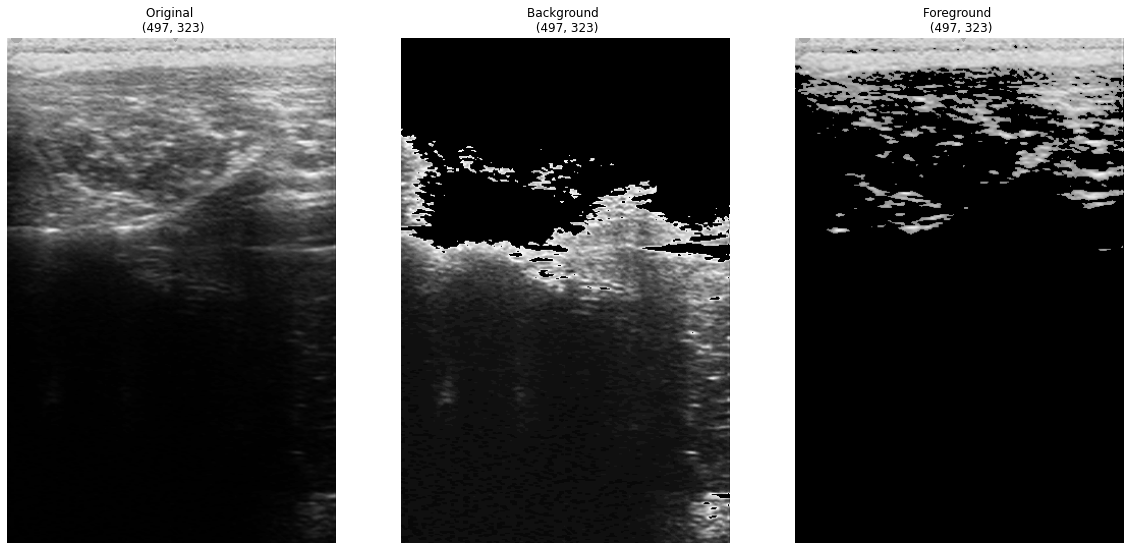

In [18]:
img.manyShowWithTitle(
    {'img': img.dimensoes[0], 'title': 'Original'},
    {'img': b_f_teste['background'], 'title': 'Background'},
    {'img': b_f_teste['foreground'], 'title': 'Foreground'}
)

# Questão 03

In [42]:
def metricas(imagens,masks,nome, red=False):
    Accuracy = 0
    CohensKappa = 0
    ROC = 0
    for i in range(len(imagens)):
        img_ori = Imagem(imagens[i])
        img_mod = Imagem(masks[i])
        img_ori.ler()
        img_mod.ler()
        
        if red:
            img_mod.redimensionar(porcentagem=0.3)
            img1 = np.array(img_ori.dimensoes[0])
            img2 = np.array(img_mod.img_redimensionada)
            jac = jaccard_score(np.argmax(img1,axis=1),np.argmax(img2,axis=1),average='weighted')
            f1 = f1_score(np.argmax(img1,axis=1),np.argmax(img2,axis=1),average='weighted')
            acc = accuracy_score(np.argmax(img1,axis=1),np.argmax(img2,axis=1))
            coh = cohen_kappa_score(np.argmax(img1,axis=1),np.argmax(img2,axis=1))
            #roc = roc_auc_score(np.argmax(img1,axis=1),np.argmax(img2,axis=1),average='micro')

        else:
            img2 = np.array(img_mod.dimensoes[0]).ravel()
            img1 = np.array(img_ori.dimensoes[0]).ravel()
            jac = jaccard_score(img1,img2,average='weighted')
            f1 = f1_score(img1,img2,average='weighted')
            acc = accuracy_score(img1,img2)
            coh = cohen_kappa_score(img1,img2)
            roc = roc_auc_score(img1,img2,average='micro')
    
        Accuracy += acc
        CohensKappa += coh

    return {
        'jacard': jac,
        'f1': f1,
        'acuracia': Accuracy/len(imagens),
        'kappa': CohensKappa/len(imagens),
        'roc': 0
    }     

In [25]:
resultados = metricas(datasetKMeans, datasetMask,'KMeans')

In [26]:
otsuResult = metricas(datasetOtsu, datasetMask,'Otsu')

In [27]:
niblackResult = metricas(datasetNiblack, datasetMask, 'Niblack')

In [43]:
agloResult = metricas(datasetAglo, datasetMask, 'Aglo',red=True)

In [44]:
results = {
    'KMeans': resultados,
    'Otsu': otsuResult,
    'Niblack': niblackResult,
    'Aglomeracao': agloResult
}

In [46]:
a = pd.DataFrame(results)

In [47]:
a

,KMeans,Otsu,Niblack,Aglomeracao
jacard,0.716288,0.718317,0.178889,0.617712
f1,0.826455,0.827269,0.303085,0.696627
acuracia,0.594319,0.820780,0.267534,0.637323
kappa,0.210683,0.476330,-0.010459,0.117167
roc,0.560853,0.709022,0.484847,0.000000


As métricas utilizadas nessa atividade estão presentes em [1], [2] e [3]. As métricas foram: Jaccard, F-Measure, Acurácia, Cohens Kappa e Receiver Operating Characteristic (ROC).

* A métrica Kappa de Cohen, introduzida por Cohen em 1960 no campo da psicologia, é uma medida corrigida de mudança de concordância entre classificações anotadas e previstas.

* A acurácia, também conhecida como índice de Rand ou precisão de pixel, é uma ou mesmo a métrica de avaliação mais conhecida em estatística. É definido como o número de proposições, consistindo em certas previsões positivas e previsões negativas, em comparação com o número total de previsões.

* A curva ROC, abreviação de Receiver Operating Characteristic, é um gráfico de linha da capacidade de diagnóstico de um classificador, visualizando seu desempenho com diferentes limites de discriminação.

* F-measure, também chamado F1, é uma métrica baseada em pontuações mais difundidas para medição de desempenho em visão computacional, bem como no campo científico MIS.

* O índice de similaridade de Jaccard compara os membros de dois conjuntos para ver quais membros são compartilhados e quais são distintos.

A partir dos diferentes casos de segmentação e os diferentes tipos de métricas, obtivemos os melhores resultados utilizando o método de seguementação Otsu com base nas métricas utilizadas. O método Otsu é eficaz para imagens com dois grupos distintos de pixels com intensidades diferentes por isso ocorreu melhores resultados com esse método.

## Artigos:
* [1] Metrics for evaluating 3D medical image segmentation: analysis, selection, and tool. (Abdel Aziz Taha e Allan Hanbury);
* [2] Towards a guideline for evaluation metrics in medical image segmentation. (Dominik Müller, Iñaki Soto‑Rey e Frank Kramer);
* [3] Comparing deep learning-based automatic segmentation of breast masses to expert interobserver variability in ultrasound imaging (Webb et al.).